In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head(10)

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,0,32,Private,309513,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
1,1,33,Private,205469,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
2,2,46,Private,149949,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
3,3,23,Private,193090,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,0
4,4,55,Private,60193,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0
5,5,33,Private,41610,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,0
6,6,40,State-gov,40024,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,38,United-States,1
7,7,45,Private,114797,HS-grad,9,Separated,Machine-op-inspct,Unmarried,Black,Female,0,0,40,United-States,0
8,8,17,Local-gov,39815,10th,6,Never-married,Other-service,Own-child,White,Female,0,0,25,United-States,0
9,9,35,Private,107991,11th,7,Never-married,Sales,Not-in-family,White,Male,0,0,45,United-States,0


In [4]:
num_columns = train_data.dtypes[train_data.dtypes != 'object'].index.tolist()
num_columns

['id',
 'age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'target']

In [5]:
def show_hist_by_target(df, columns):
    cond_1 = (df['target'] == 1)
    cond_0 = (df['target'] == 0)
    
    for column in columns:
        fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), squeeze=False)
        sns.violinplot(x='target', y=column, data=df, ax=axs[0][0])
        sns.distplot(df[cond_0][column], ax=axs[0][1], label='0', color='blue')
        sns.distplot(df[cond_1][column], ax=axs[0][1], label='1', color='red')

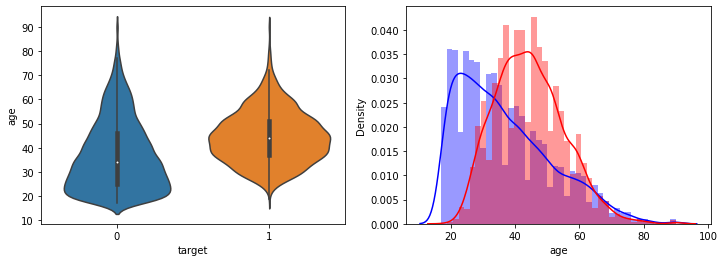

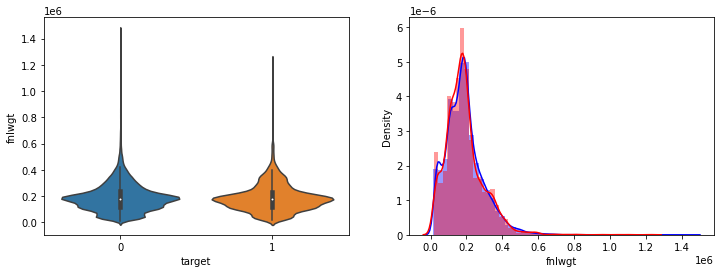

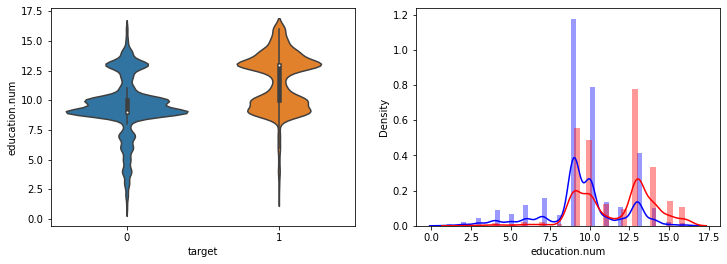

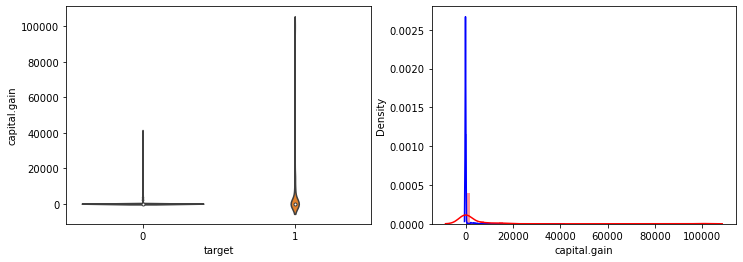

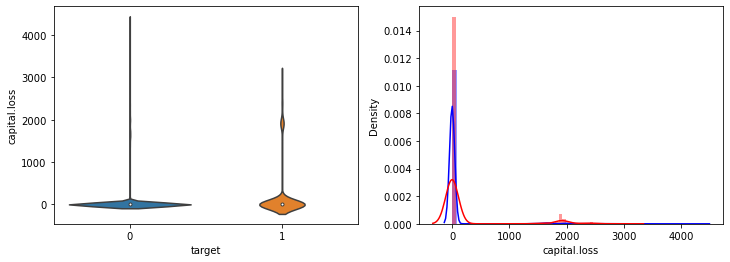

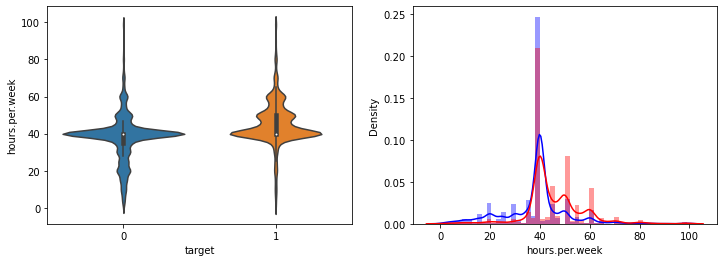

In [6]:
show_hist_by_target(train_data, num_columns[1:-1])

In [7]:
object_columns = train_data.dtypes[train_data.dtypes == 'object'].index.tolist()

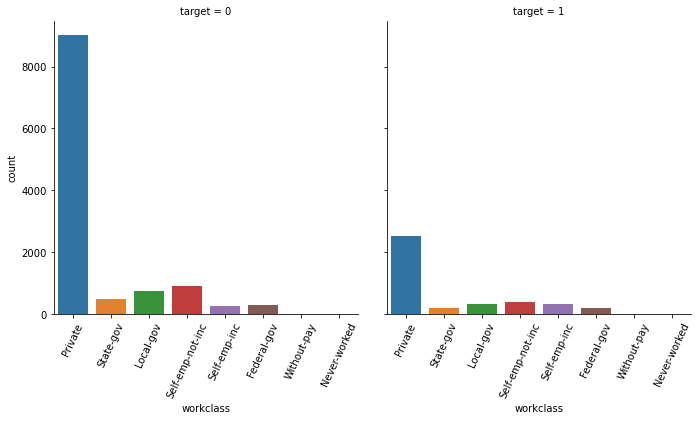

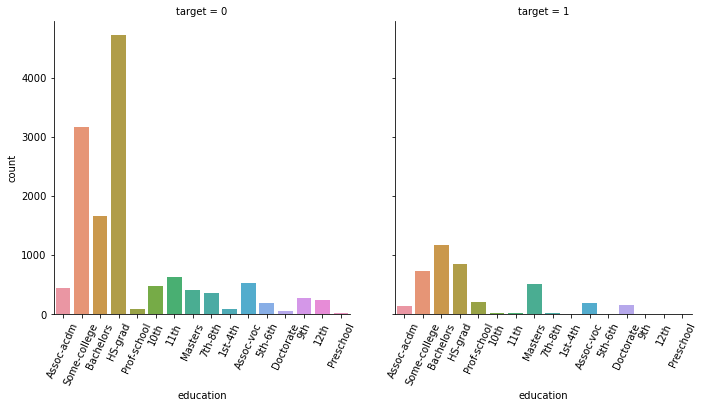

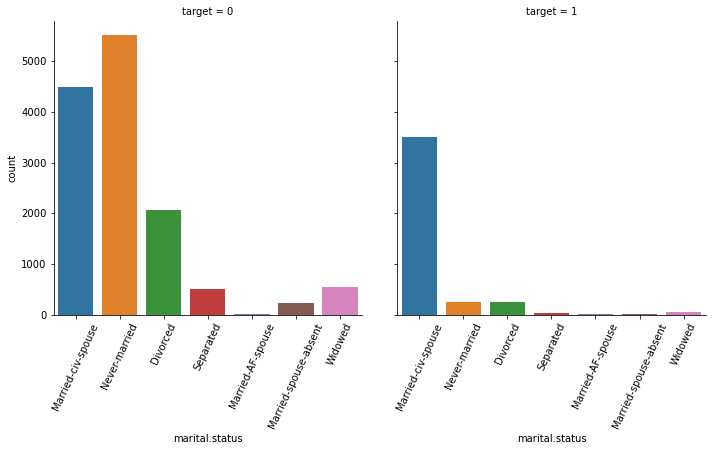

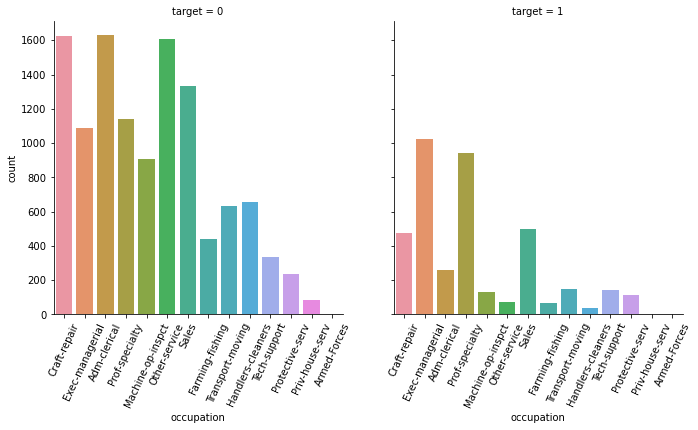

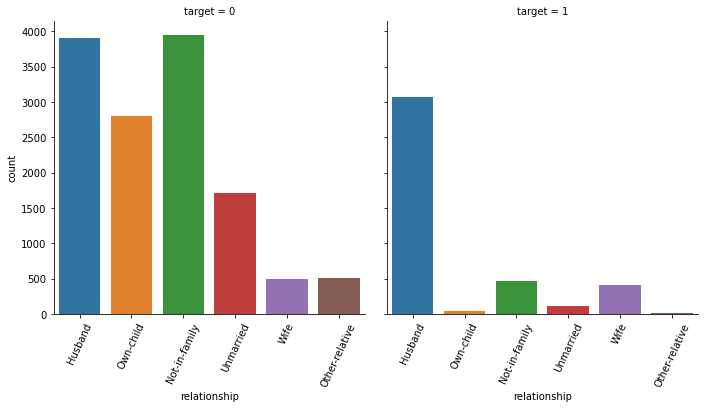

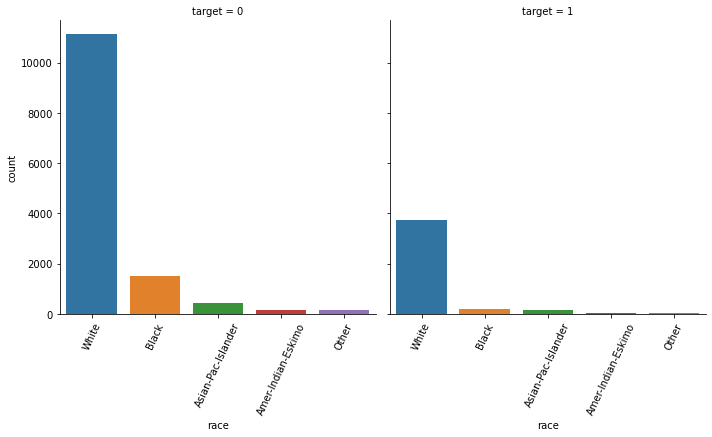

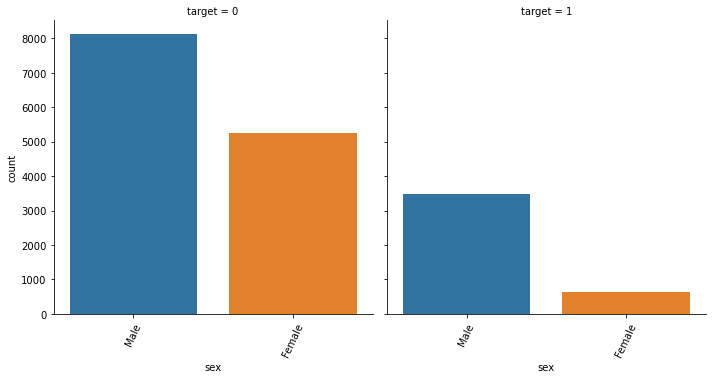

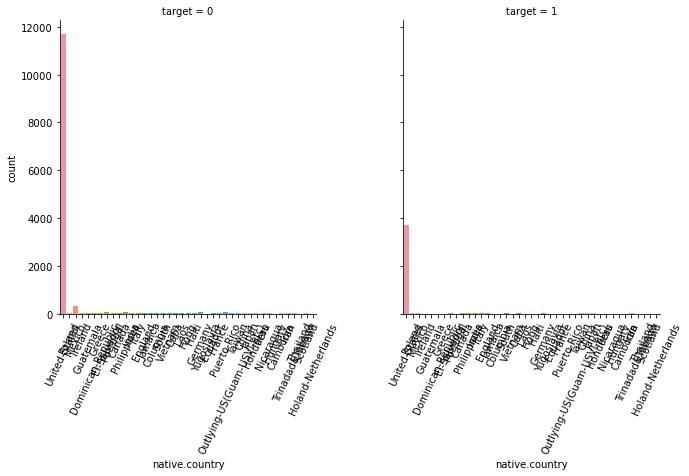

In [8]:
def show_category_by_target(df, columns):
    for column in columns:
        chart = sns.catplot(x=column, col='target', data=df, kind='count')
        chart.set_xticklabels(rotation=65)
    
show_category_by_target(train_data, object_columns)

<AxesSubplot:>

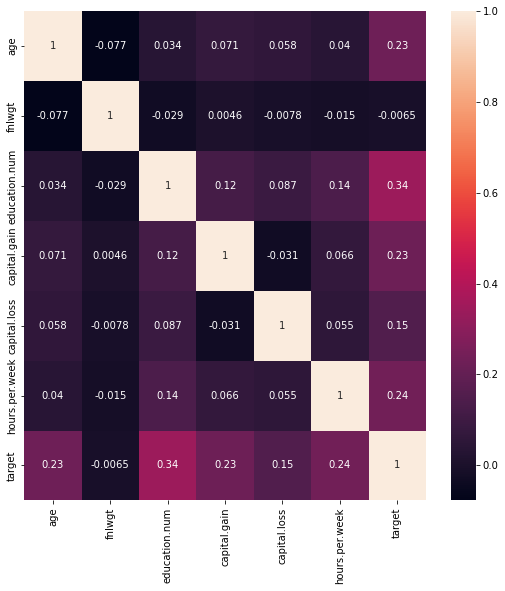

In [10]:
corr = train_data[num_columns[1:]].corr()
plt.figure(figsize=(9,9))
sns.heatmap(corr, annot=True)